In [1]:
# offizielle libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# selbstgeschrieben
import file_organizer as fo
from func import get_norm_cm
from func import ticks_handle

In [38]:
path = "data_day_one"
file_list = fo.load_file_list(path)
selection = fo.select_files(file_list, "meas", "A")
data = fo.load_files(selection)
data = fo.df_combine(data)
del data["iout"]
data["time"]=data["time"]*1000
label = list(data.columns)
label.remove('time')
legends=["Min (<0.01)ms","0.033ms","0.33ms"]

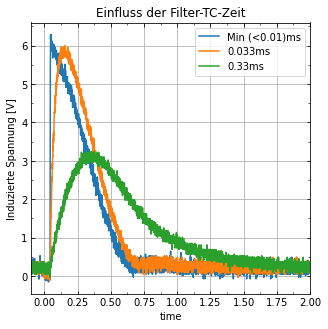

In [42]:
fig,(ax)=plt.subplots(1,1, figsize=(5,5))

data.plot(x="time",y=label,ax=ax,label=legends)
ax.set_title("Einfluss der Filter-TC-Zeit")
ax.legend()
ax.set_xlim((-0.1,2))
ax.set_ylabel("Induzierte Spannung [V]")
ax.grid()
ticks_handle(ax, which='both')
fig.savefig('IMAGES/param_filterTC.png')
plt.show()

In [4]:
data

,time,signal_10,signal_11,signal_13
0,-0.002294,0.248493,0.208292,0.208292
1,-0.002293,0.208292,0.127890,0.208292
2,-0.002293,0.208292,0.369096,0.248493
3,-0.002292,0.047488,0.168091,0.208292
4,-0.002292,0.087689,0.047488,0.168091
...,...,...,...,...
9995,0.002704,NaN,NaN,NaN
9996,0.002704,NaN,NaN,NaN
9997,0.002704,NaN,NaN,NaN
9998,0.002705,NaN,NaN,NaN


In [14]:
_deepnote_run_altair(data, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"line","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"time","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"signal_11","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c333ff75-d5d2-432c-b928-cf45631da0c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>